# Image classification model with TensorFlow

[Online Tutorial](<https://keras.io/examples/vision/image_classification_from_scratch/>)

## Install packages and libraries

In [4]:
!pip install tensorflow

## Loading packages

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os
import tqdm

## Download and open the file

When copying from a tutorial, make sure you copy the entire cell.  For this best copy from left to right and check the results, including in your local folder, to see that files downloaded correctly.

In [7]:
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  786M    0 6206k    0     0  6206k      0  0:02:09 --:--:--  0:02:09 8103k
  2  786M    2 16.8M    0     0  16.8M      0  0:00:46  0:00:01  0:00:45 9767k
  3  786M    3 27.8M    0     0  13.9M      0  0:00:56  0:00:02  0:00:54 10.0M
  4  786M    4 38.7M    0     0  12.9M      0  0:01:00  0:00:03  0:00:57 10.2M
  6  786M    6 49.9M    0     0  12.4M      0  0:01:02  0:00:04  0:00:58 10.4M
  7  786M    7 60.7M    0     0  12.1M      0  0:01:04  0:00:05  0:00:59 10.9M
  9  786M    9 71.7M    0     0  11.9M      0  0:01:05  0:00:06  0:00:59 10.9M
 10  786M   10 82.7M    0     0  11.8M      0  0:01:06  0:00:07  0:00:59 10.9M
 11  786M   11 93.7M    0     0  11.7M      0  0:01:07  0:00:08  0:00:59 10.9M
 13  786M   13  104M    0     0  11.6M      0  0:01

## Mac version

In [71]:
!unzip -q kagglecatsanddogs_3367a.zip
!ls

replace MSR-LA - 3467.docx? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C
Classification_tutorial.ipynb README.md
Debugs                        Untitled.ipynb
MSR-LA - 3467.docx            kagglecatsanddogs_3367a.zip
PetImages                     readme[1].txt


## Windows version

In [8]:
# test if directory exist
# use subprocess or zipfile package in pure python
dirToTest = "PetImages"
if os.path.isdir(dirToTest) == False :
    !tar.exe -xf kagglecatsanddogs_3367a.zip 
else:
    !tar.exe -rf kagglecatsanddogs_3367a.zip

!dir

 Volume in drive C has no label.
 Volume Serial Number is 6077-5E3A

 Directory of C:\Users\offmr\Documents\DSTI\Python_ML_LAB\Oct16\repos\211016_PL_Images

10/16/2021  12:33 PM    <DIR>          .
10/16/2021  12:33 PM    <DIR>          ..
10/16/2021  12:26 PM    <DIR>          .ipynb_checkpoints
10/16/2021  12:32 PM            16,141 Classification_tutorial.ipynb
10/16/2021  12:33 PM       824,894,548 kagglecatsanddogs_3367a.zip
02/10/2017  10:55 AM            35,545 MSR-LA - 3467.docx
10/16/2021  12:33 PM    <DIR>          PetImages
10/16/2021  10:21 AM                74 README.md
02/10/2017  10:51 AM               104 readme[1].txt
               5 File(s)    824,946,412 bytes
               4 Dir(s)  787,339,558,912 bytes free


Check to see the folders unzipped correctly.  Here we have two folders labelled 'Cats' and 'Dogs', which are the classes we will be using to classify

## Filter out corrupted images

When working with lots of real-world image data, corrupted images are a common occurence. Let's filter out badly-encoded images that do not feature the string "JFIF" in their header.

In [9]:
def getSubDirs(inputDir): #Function that gives the list of subdirectories

    rClasseList =[] #Empty list of subdirectories

    for fname in os.listdir(inputDir): #Go over all elements in the directory
        fpath = os.path.join(inputDir, fname) #Create full path to each element
        if os.path.isdir(fpath): #Check if it is a directory or not.
            rClasseList.append(fname) #If it is a directory add it to the list

    return rClasseList

In [10]:
getSubDirs ("./PetImages")

['Cat', 'Dog']

We have two categories Cat and Dog

In [11]:
def count_files (inputDir):
    classes = getSubDirs (inputDir)
    
    for folder_name in classes: #look through folders that have the names of classes
        folder_path = os.path.join(inputDir, folder_name) 
        path, dirs, files = next(os.walk(folder_path))
        file_count = len(files)
        # print (folder_name, 'contains ', file_count, ' files') #This is one way to do it
        print (f'{folder_name} contains {file_count} files') #This another.
    

In [75]:
count_files ("./PetImages")

Cat contains 12501 files
Dog contains 12501 files


## delete_corrupt files (function)

In [15]:
def delete_corrupt (input_dir):
    classes= getSubDirs (input_dir)
    print (classes)
    num_skipped = 0  #defines the counter of photos deleted
    
    for folder_name in tqdm.tqdm(classes) :  #look through folders that have the names of classes
        folder_path = os.path.join(input_dir, folder_name) #it creates folderpath for classes in the given folder
        for fname in os.listdir(folder_path): # fnmane is just the "counter" or local variable (like an i).
            #This line will combine the file name to the directory path.  The "glob2" lists files and folders etc.
            fpath = os.path.join(folder_path, fname) #Combines folder path and file name
            try:
                fobj = open(fpath, "rb") #Opens file.  The "rb" command opens the file in binary mode. Use this with images.
                is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10) #Look at the first ten bytes of the fiel,
                                                                        #where the marker is to be found
            finally:
                fobj.close()

            if not is_jfif:
                num_skipped += 1
                # Delete corrupted image
                os.remove(fpath)

    print("Deleted %d images" % num_skipped)
    

[Check this for more information](https://stackoverflow.com/questions/62220855/tensorflow-removing-jfif)

In [16]:
delete_corrupt ('./PetImages')

['Cat', 'Dog']


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.69it/s]

Deleted 0 images


In [17]:
count_files ("./PetImages")

Cat contains 11749 files
Dog contains 11675 files


## Generate the Dataset

In [21]:
def generateDataset (pInputDir, pValidation_split, pImage_size, pBatch_size):
    """
        pInputDir : input directorywhere the subdirs are presents
        pValidation_split : validation_split param 0.x format
        pImage_size : image_size param (x,y) format
        pBatch_size : batch_size param , set of images
    """
   
    train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        pInputDir,
        validation_split=pValidation_split,
        subset="training",
        seed=1337,
        image_size=pImage_size,
        batch_size=pBatch_size,
    )
    val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        pInputDir,
        validation_split=pValidation_split,
        subset="validation",
        seed=1337,
        image_size=pImage_size,
        batch_size=pBatch_size,
    )
    
    return train_ds, val_ds

## test the dataset generation

In [22]:
image_size = (180, 180)
batch_size = 32
inputDir="PetImages"
validation_split=0.2

to_train_ds, validation_ds = generateDataset (inputDir,validation_split, image_size, batch_size  )

Found 23422 files belonging to 2 classes.
Using 18738 files for training.
Found 23422 files belonging to 2 classes.
Using 4684 files for validation.


## print out 1st element into to_train_ds (Training Set)

In [51]:
for element in to_train_ds:
    # show 1 element
    print(element)
    # show the tensor part of the 1st element element
    print("Tensor of 1st element \n" , element[0].shape)
    
    # do not iterate over the full dataset it is too big
    break

(<tf.Tensor: shape=(32, 180, 180, 3), dtype=float32, numpy=
array([[[[ 11.875    ,  10.875    ,   5.875    ],
         [ 19.638542 ,  18.638542 ,  13.638541 ],
         [ 19.125    ,  18.125    ,  13.125    ],
         ...,
         [123.00625  , 106.76979  ,  93.61771  ],
         [ 47.64479  ,  38.39479  ,  31.519793 ],
         [ 73.0875   ,  61.5875   ,  51.9625   ]],

        [[ 11.55     ,  10.55     ,   5.55     ],
         [ 19.425    ,  18.425    ,  13.425    ],
         [ 18.8      ,  17.8      ,  12.8      ],
         ...,
         [123.19375  , 107.06875  ,  93.69375  ],
         [ 44.734375 ,  35.484375 ,  28.609375 ],
         [ 71.34375  ,  59.84375  ,  50.21875  ]],

        [[ 10.875    ,   9.875    ,   4.875    ],
         [ 18.75     ,  17.75     ,  12.75     ],
         [ 18.125    ,  17.125    ,  12.125    ],
         ...,
         [130.45833  , 114.197914 , 100.890625 ],
         [ 42.21875  ,  33.036457 ,  25.958334 ],
         [ 71.041664 ,  58.526043 ,  48.8333

## show first image of the batch of 32

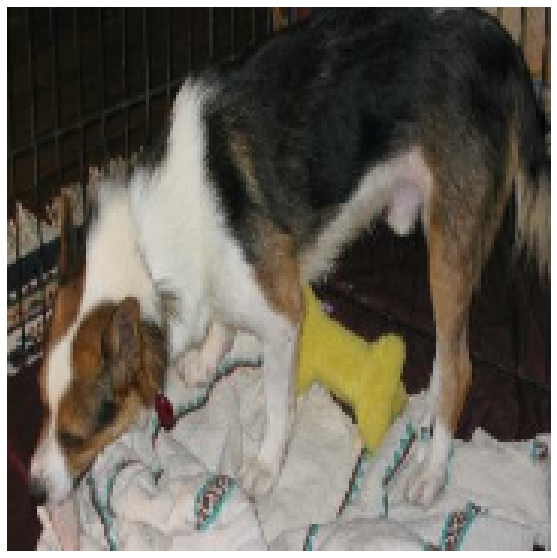

In [52]:

# display image
plt.figure(figsize=(10, 10))  # image size
plt.axis("off")               # remove axis
plt.imshow(element[0][0].numpy().astype("uint8"))  #need to convert to int unsigned integer 8 

## try with  .take


In [ ]:
## show more image sin a for loop

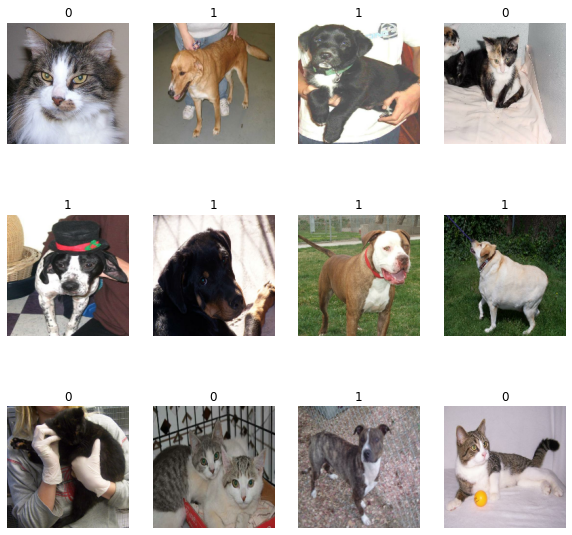

In [58]:
# choose output size of the display here
plt.figure(figsize=(10, 10))
# loop into to_train_ds to take x images, here 9
for images, labels in to_train_ds.take(1):
    for i in range(12):
        # show images on X rows , Y columns, i+1 is index images from 1 to x
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8")) # convert image in uint8
        plt.title(int(labels[i])) # show class where an image belong
        # class comes from subdir structure "Cat", "Dog" => class 0, class1
        plt.axis("off")

When many animals are present, how the choice is made between the different classes ?
Try to find 2 dogs, 2 cats, Dogs and cats , more dogs than cats
already test : 2 cats  => cat

## Augment data
When you don't have a large image dataset, it's a good practice to artificially introduce sample diversity by applying random yet realistic transformations to the training images, such as random horizontal flipping or small random rotations. This helps expose the model to different aspects of the training data while slowing down overfitting.


In [65]:
def define_SequentialTransformation(pFlipOrientation, pRotationvalue):
    """
        pFlipOrientation : provide an orientation param in "horizontal", "vertical", "horizontal_and_vertical".
        pRotationvalue : provide a value for factor of layers.RandomRotation function
        return the keras.sequential object
    """

    data_augmentation = keras.Sequential(
        [
            layers.RandomFlip(pFlipOrientation),
            layers.RandomRotation(pRotationvalue),
        ]
    )
    
    return data_augmentation


We are in a sequential model, it is a composition of transformations : 1st  RandomFlip, 2nd RandomRotation
"yet realistic transformations" drive the choice of transformations

In [67]:
def show_transformation(img_data_augmentation):

    plt.figure(figsize=(10, 10))
    # retreive images  but there are 2 parts in to_train_ds.take(x) 
    # we discard the second element. the _ is necessary to execute the function but we are not interested in it
    for images, _ in to_train_ds.take(1):
        for i in range(12):
            augmented_images = img_data_augmentation(images)
            ax = plt.subplot(3, 4, i + 1)
            plt.imshow(augmented_images[0].numpy().astype("uint8"))
            plt.axis("off")

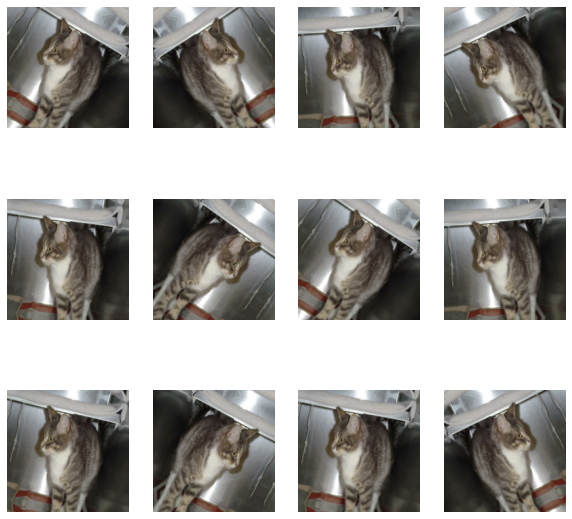

In [68]:
image_data_augmentation = define_SequentialTransformation("horizontal", 0.1)

show_transformation(image_data_augmentation)

# Standardizing the data 
Our image are already in a standard size (180x180), as they are being yielded as contiguous float32 batches by our dataset. However, their RGB channel values are in the [0, 255] range. This is not ideal for a neural network; in general you should seek to make your input values small. Here, we will standardize values to be in the [0, 1] by using a Rescaling layer at the start of our model.

In [81]:
# create a shape to include the channels numbers to image_size =(180,180) as dimension 
input_shape = (image_size[0],image_size[1],3)

# create a keras input with this input_shape
inputs= keras.Input(shape=input_shape)

# apply data_augmentation to this input
x = data_augmentation(inputs)

# add a layer of rescaling to standardize size between 0 and 1
x = layers.Rescaling(1./255)(x)
